In [12]:
import nltk


### TO FIND MOST FREQUENT WORDS IN 2020 US ELECTION WIKIPEDIA PAGE

In [13]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen("https://en.wikipedia.org/wiki/2020_United_States_presidential_election")
raw_text = BeautifulSoup(html.read());
text= raw_text.get_text(strip=True) #remove html tags by strip=True


In [14]:
nltk.download('punkt')
#tokens = [t for t in text.split()]
tokens = nltk.word_tokenize(text) #tokenize the words
tokens = [token for token in tokens if token.isalnum()] #remove puntuation


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
# remove all words starting with 'wg' as i see some some  more text cleaning required
#also remove token such as y1 y2 y3 etc
tokens_new  = tokens[:]
for token in tokens:
  if (token.startswith('w')) and (token[1]=='g'):
     tokens_new.remove(token)
  if (token == 'y1') or (token=='y2') or (token=='y3') or (token=='How') or (token=='The') or (token=='x'):
    tokens_new.remove(token)


In [16]:
#remove stopwords from tokens
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
clean_tokens  = tokens_new[:]
for token in tokens_new:
  if token in stopwords:
    clean_tokens.remove(token)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
freq = nltk.FreqDist(clean_tokens) #frequency of words and their distribution
count=0 # we will display ony first 25 words and their distribution
for key,value in freq.items():
  print(key,value)
  count +=1
  if count == 25:
    break

2020 827
United 81
States 97
presidential 131
election 272
1 53
dmy 1
January 71
February 19
March 32
April 26
May 30
June 48
July 53
August 47
September 105
October 158
November 286
December 85
0 29
view 3
null 1
CS1 2
maint 5
discouraged 5


TOP 20 MOST COMMON WORDS IN US ELECTION 2020 WIKIPEDIA PAGE


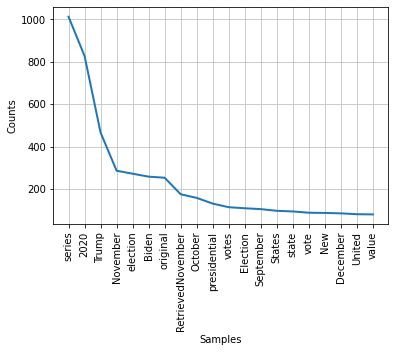

In [20]:
# plot the top 20 frequency of words 
import matplotlib.pyplot as plt
print('TOP 20 MOST COMMON WORDS IN US ELECTION 2020 WIKIPEDIA PAGE')
freq.plot(20,cumulative=False)
